# Logistic Regression
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/9-1.png" style="max-width: 80%; height: auto;">

* training data 특성과 관계 등을 파악 한 후에, <font color=red>미지의 입력 데이터의 결과가 어떤 종류의 값으로 분류 될 수 있는지 예측</font>하는 것

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/9-2.png" style="max-width: 80%; height: auto;">

### Rogistic Regression 알고리즘 
1. Traning data 특성과 분포를 나타내는 최적의 직선을 찾고 <font color=blue>Linear regression</font>
2. 그 직선을 기준으로 데이트를 분류해주는 <font color=blue>Classification</font> 알고리즘.

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/9-3.png" style="max-width: 80%; height: auto;">
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/9-4.png"style="max-width: 80%; height: auto;">

### Sigmoid 함수
* 출력값 $y$가 $1$ 또는 $0$만 가져야 하는 분류$(classification)$ 시스템에서, 함수값으로 $0\sim1$ 사이의 값을 가지는 $sigmoid$ 함수를 사용 할 수 있음.
* $linear \ regression$의 결과 값$(z=Wx+b)$이 어떤 값을 가지더라도, $sigmoid$ 함수값$(y=sigmoid(z))$은 $0\sim1$ 사이값을 가가지며, <font color=red>$sigmoid(z) < 0.5$ 이면 결과값 $y=0$ , $sigmoid(z) \ge 0.5$ 이면 결과값 $y=1$</font>로 정의하여 $classification$ 시스템을 구현
<font size=3>
* $ \displaystyle
z = Wx+b \rightarrow sigmoid(z) = \sigma(z) =\frac{1}{1+e^{-z}}$
* $ \displaystyle y=\frac{1}{1+e^{-(Wx+b)}}
$</font>


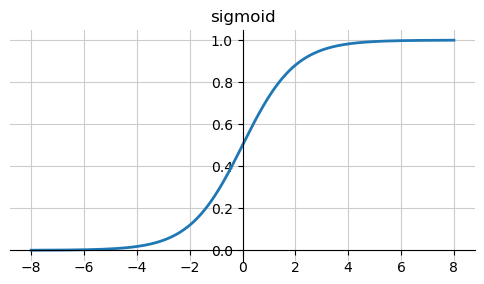

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 2

x = np.linspace(-8, 8, 1000)
y = 1/(1+np.exp(-x))

fig, ax = plt.subplots()
ax.plot(x, y)

plt.title('sigmoid')
plt.grid(color='0.8')
ax.spines['left'].set_position(('data',0)) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 
ax.spines['bottom'].set_position(('data',0)) 


plt.show()

### 손실함수 $(cross-entropy)$

* $classfication$ 최종 출력 값 $y$는 $sigmoid$함수에 의해 논리적으로 $0 \ or \ 1$ 이기때문에, 연속값을 갖는 $linear \ regression$때와는 다른 손실함수가 필요함.

- $ \displaystyle y=\frac{1}{1+e^{-(Wx+b)}}\ , \ \ \ t_i= 0 \ or \ 1$

- <font color=red>
 $ \displaystyle cross-entropy: \ E(W,b)= - \sum_{i=1}^{n}{\{t_i \log{y_i}+(1-t_i)\log{(1-y_i)}\}} $
</font>

- <font color=blue> 손실함수 $E(W,b)$를 최소화하는 $W \ and \ b$   </font>

<font color=blue><b>
- $ \displaystyle W = W - \alpha \frac{\partial{E(W,b)}}{\partial{W}} \ \ \ \ , \ \ \ \ 
     b = b - \alpha \frac{\partial{E(W,b)}}{\partial{b}}$
</b></font>


- $\alpha$는 학습율$(learning \ rate)$</font>, $W$값이 감소 또는 증가하는 비율을 나타냄.

### 손실함수$(loss \ function) \ cross-entropy$ 유도
* $classfication$ 최종 <font color=red>출력 값 $y$는 $0 \ or \ 1$ </font>이 되어야 함.
* $sigmoid$함수의 출력값은 $0 \sim 1$의 값으로 <b>확률적</b>의미를 갖기 때문에 <b>확률변수 $C$</b>를 이용해 출력 값을 나타낼 수 있음.
* 즉, 출력값이 $0 \ or \ 1$ 이 될 확률이 최대가 되도록 가중치 W와 바이어스 b를 결정함.
* $0 \ or \ 1$의 분류가 아닌 <b>다른 정답 t 가 있다면, 정답 t가 될 확률</b>이 최대가 되도록 가중치 W와 바이어스 b를 결정함.

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/9-5.png" style="max-width: 80%; height: auto;">

## Logistic regression using python
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/9-6.png" style="max-width: 80%; height: auto;">
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/9-7.png" style="max-width: 80%; height: auto;">

### 1. Training Data

In [2]:
import numpy as np

data = np.array([[2,0],[4,0],[6,0],[8,0],[10,0],[12,0],[14,1],[16,1],[18,1],[20,1]])
x_data = data[:,[0]]
t_data = data[:,[-1]]

print(data.shape)
print(x_data.shape)
print(t_data.shape)

(10, 2)
(10, 1)
(10, 1)


## 2. 임의의 직선 $y=Wx+b$ 정의 (임의의 $W, \ b$ 초기화)

In [3]:
W = np.random.rand(1,1)
b = np.random.rand(1)

print(f"W = {W}, W.shape = {W.shape}, b = {b}, b.shape = {b.shape}")

W = [[0.1680784]], W.shape = (1, 1), b = [0.525293], b.shape = (1,)


## 3. 손실함수 $E(W)$ 정의

In [4]:
def sigmoid(x):
    y = 1 / (1+np.exp(-x))
    return y

def loss_func(x,t):
    delta = 1e-7
    
    z = np.dot(x,W) + b
    y = sigmoid(z)
    
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log((1-y)+delta))

## 4. 수치미분 numerical_derivative 및 utility 함수 정의

In [5]:
def numerical_derivative(f,x):  
    delta_x = 1e-4
    grad = np.zeros_like(x)  
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx=it.multi_index
        tmp_val=x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) 
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)  
        grad[idx] = (fx1 - fx2)/(2*delta_x)

        x[idx] = tmp_val
        it.iternext()
        
    return grad

def error_val(x,t):
    delta = 1e-7
    z=np.dot(x,W)+b
    y=sigmoid(z)
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log((1-y)+delta))

def predict(x):
    z=np.dot(x,W)+b
    y=sigmoid(z)
    
    if y > 0.5:
        result = 1
    else:
        result = 0
    
    return y, result

## 5. 학습율(learning rate) 초기화 및 $W, b$ 업데이트


In [6]:
learning_rate=1e-2

f = lambda x: loss_func(x_data,t_data)  # f(x) = loass_func(x_data,y_data)

print(f"initial error value = {error_val(x_data,t_data)}, initial W = {W}")

for step in range(10001):
    W-= learning_rate*numerical_derivative(f,W)
    b-= learning_rate*numerical_derivative(f,b)
    
    if(step % 400 ==0):
        print(f"step = {step}, error_value = {error_val(x_data,t_data)}, W = {W}, b = {b}")

initial error value = 11.488941352439015, initial W = [[0.1680784]]
step = 0, error_value = 12.731741078010579, W = [[-0.17402504]], b = [0.54115042]
step = 400, error_value = 2.757732115595379, W = [[0.28355673]], b = [-4.1552353]
step = 800, error_value = 1.775469768624206, W = [[0.45545462]], b = [-5.66895806]
step = 1200, error_value = 1.5131728511438, W = [[0.53229587]], b = [-6.69207554]
step = 1600, error_value = 1.349227285719083, W = [[0.59327152]], b = [-7.50173966]
step = 2000, error_value = 1.2336025224417615, W = [[0.64460445]], b = [-8.18188035]
step = 2400, error_value = 1.1459639011904084, W = [[0.68937675]], b = [-8.77404692]
step = 2800, error_value = 1.076282503555517, W = [[0.72935682]], b = [-9.3020576]
step = 3200, error_value = 1.0189604889356108, W = [[0.76566086]], b = [-9.78093017]
step = 3600, error_value = 0.9705910744028702, W = [[0.79904232]], b = [-10.22079065]
step = 4000, error_value = 0.9289638773390821, W = [[0.83003585]], b = [-10.62881623]
step = 44

In [7]:
(real_val,logical_val)=predict(3)
print(real_val, logical_val)

(real_val,logical_val)=predict(17)
print(real_val, logical_val)

[[1.11627958e-05]] 0
[[0.99129838]] 1


## 6. Multi-variable Logistic Regression Code

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/9-8.png" style="max-width: 80%; height: auto;">

In [8]:
import numpy as np

x_data = np.array([[2,4],[4,11],[6,6],[8,5],[10,7],[12,16],[14,8],[16,3],[18,7]])
t_data = np.array([0,0,0,0,1,1,1,1,1]).reshape(9,1)

# print(x_data, x_data.shape)
# print(y_data, y_data.shape)

W = np.random.rand(2,1)
b = np.random.rand(1)
print(f"W={W}, W.shape={W.shape}, b={b}, b.shape={b.shape}")

def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y
                   
def loss_func(x,t):
    delta = 1e-7
    z=np.dot(x,W)+b
    y=sigmoid(z)
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log((1-y)+delta))

def numerical_derivative(f,x):
    delta_x = 1e-4
    grad = np.zeros_like(x) 
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx=it.multi_index
        tmp_val=x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) 
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)  
        grad[idx] = (fx1 - fx2)/(2*delta_x)

        x[idx] = tmp_val
        it.iternext()
        
    return grad

def error_val(x,t):
    delta = 1e-7
    z=np.dot(x,W)+b
    y=sigmoid(z)
    return -np.sum(t*np.log(y)+(1-t)*np.log(1-y))
            
def predict(x):
    z=np.dot(x,W)+b
    y=sigmoid(z)
    if y > 0.5:
        result = 1
    else:
        result = 0
    return y,result

learning_rate=1e-2

f = lambda x: loss_func(x_data,t_data)  # f(x) = loass_func(x_data,y_data)

print(f"initial error value = {error_val(x_data,t_data)}, initial W = {W}")

for step in range(10001):
    W -= learning_rate*numerical_derivative(f,W)
    b -= learning_rate*numerical_derivative(f,b)
    
    if(step % 400 ==0):
        print(f"step = {step}, error_value = {error_val(x_data,t_data)}, W = {W}, b = {b}")

test_data = np.array([3,17])
print(test_data,test_data.shape)
predict(test_data)

W=[[0.39580251]
 [0.32763732]], W.shape=(2, 1), b=[0.30922069], b.shape=(1,)
initial error value = 17.77920829872341, initial W = [[0.39580251]
 [0.32763732]]
step = 0, error_value = 7.821055709889517, W = [[0.19892496]
 [0.07239022]], b = [0.27680515]
step = 400, error_value = 2.2177453441712762, W = [[ 0.42743632]
 [-0.08253774]], b = [-2.73087511]
step = 800, error_value = 1.5693862823541869, W = [[ 0.54136875]
 [-0.02414727]], b = [-4.32982828]
step = 1200, error_value = 1.2681507067345292, W = [[0.62740555]
 [0.01050733]], b = [-5.42377743]
step = 1600, error_value = 1.0906396994638243, W = [[0.69704747]
 [0.03536861]], b = [-6.26438571]
step = 2000, error_value = 0.9713462800742997, W = [[0.75584899]
 [0.05525296]], b = [-6.95369674]
step = 2400, error_value = 0.8842408927313138, W = [[0.80689288]
 [0.07231805]], b = [-7.54275291]
step = 2800, error_value = 0.8169258809710815, W = [[0.85207028]
 [0.08768617]], b = [-8.06057967]
step = 3200, error_value = 0.7627321701575785, W = [

(array([0.01526701]), 0)

In [9]:
test_data = np.array([3,17])
(real_val,logical_val)=predict(test_data)
print(test_data, real_val, logical_val)

test_data = np.array([[7,17],[5,8],[7,2],[10,0],[12,0],[0,12],[10,16]])
for test in test_data[:,:]:
    (real_val,logical_val)=predict(test)
    print(test, real_val, logical_val)

[ 3 17] [0.01526701] 0
[ 7 17] [0.72259732] 1
[5 8] [0.01186675] 0
[7 2] [0.02324072] 0
[10  0] [0.37252817] 0
[12  0] [0.88499874] 1
[ 0 12] [6.94413114e-05] 0
[10 16] [0.98887505] 1
